In [7]:
import torch
from torch.distributions import multinomial
from matplotlib import pyplot as plt
import drawPlot

掷骰子

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 4., 2., 1., 0., 3.])

In [4]:
# 将结果存储为32位浮点数以进⾏除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值

tensor([0.1750, 0.1530, 0.1620, 0.1730, 0.1620, 0.1750])

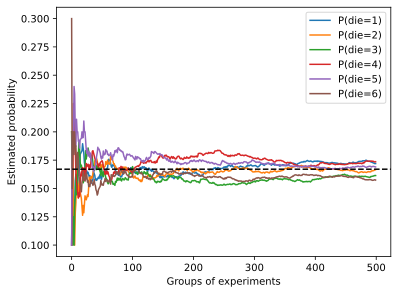

In [8]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

drawPlot.set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(), 
             label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()